#1. What is unsupervised learning in the context of machine learning?
Unsupervised learning is a type of machine learning where the model learns patterns and structures in data without predefined labels or outcomes. It’s commonly used for clustering, dimensionality reduction, and anomaly detection.

#2. How does K-Means clustering algorithm work?

Choose k cluster centers (randomly or with K-Means++).

Assign each data point to the nearest cluster center (based on distance).

Update each cluster center to be the mean of its assigned points.

Repeat steps 2–3 until assignments stop changing or a stopping criterion is met.

#3. Explain the concept of a dendrogram in hierarchical clustering
A dendrogram is a tree-like diagram that shows the sequence of merges or splits in hierarchical clustering. It visually represents the hierarchy of clusters, with the y-axis showing distance or dissimilarity between clusters.

#4. What is the main difference between K-Means and Hierarchical Clustering?

K-Means: Partitional, requires k upfront, iterative, faster for large datasets.

Hierarchical: Builds a cluster hierarchy, doesn’t need k initially, slower for large datasets.

#5. What are the advantages of DBSCAN over K-Means?

Doesn’t require specifying k in advance.

Can find clusters of arbitrary shapes.

Handles noise and outliers better.

#6. When would you use Silhouette Score in clustering?
You use it to evaluate how well clusters are formed by measuring cohesion (within-cluster similarity) and separation (distance from other clusters). Higher values indicate better clustering.

#7. What are the limitations of Hierarchical Clustering?

High computational cost for large datasets.

Sensitive to noise and outliers.

Once merged/split, clusters can’t be changed.

#8. Why is feature scaling important in clustering algorithms like K-Means?
Because K-Means uses distance metrics (e.g., Euclidean distance), unscaled features with larger ranges can dominate, leading to biased clustering results.

#9. How does DBSCAN identify noise points?
Points that are not reachable from any core point (i.e., they don’t meet the minimum number of neighbors within eps) are marked as noise.

#10. Define inertia in the context of K-Means
Inertia is the sum of squared distances between each point and its assigned cluster center; lower inertia means points are closer to their centers.

#11. What is the elbow method in K-Means clustering?
A technique to determine optimal k by plotting inertia vs. k and choosing the point where the decrease in inertia sharply levels off (“elbow”).

#12. Describe the concept of "density" in DBSCAN
Density refers to the number of points within a specified radius (eps). Higher density areas form clusters, while low-density areas are noise.

#13. Can hierarchical clustering be used on categorical data?
Yes, but you must use appropriate distance measures (e.g., Hamming distance) and sometimes transform categorical variables into numerical form.

#14. What does a negative Silhouette Score indicate?
It means a point is assigned to the wrong cluster — it’s closer to another cluster’s points than its own cluster’s points.

#15. Explain the term "linkage criteria" in hierarchical clustering
It defines how distances between clusters are measured when merging:

Single linkage: minimum pairwise distance.

Complete linkage: maximum pairwise distance.

Average linkage: average pairwise distance.

#16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
Because it assumes clusters are spherical, equally sized, and have similar densities; irregular clusters violate this assumption.

#17. What are the core parameters in DBSCAN, and how do they influence clustering?

eps: Maximum distance to consider points as neighbors.

min_samples: Minimum number of points needed to form a dense region (core point).
These determine how clusters are formed and how noise is detected.

#18. How does K-Means++ improve upon standard K-Means initialization?
It spreads out the initial cluster centers by choosing each new center with a probability proportional to its squared distance from the nearest chosen center, improving convergence and accuracy.

#19. What is agglomerative clustering?
A bottom-up hierarchical clustering approach where each point starts as its own cluster, and pairs of clusters are merged step-by-step based on linkage criteria.

#20. What makes Silhouette Score a better metric than just inertia for model evaluation?
Inertia only measures compactness (within-cluster distance) but ignores separation between clusters. Silhouette Score considers both compactness and separation, giving a more complete evaluation.



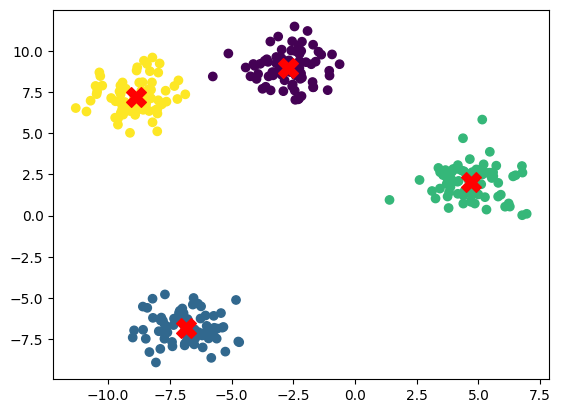

In [30]:
#21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.show()


In [31]:

#22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)
print(labels[:10])


[1 1 1 1 1 1 1 1 1 1]


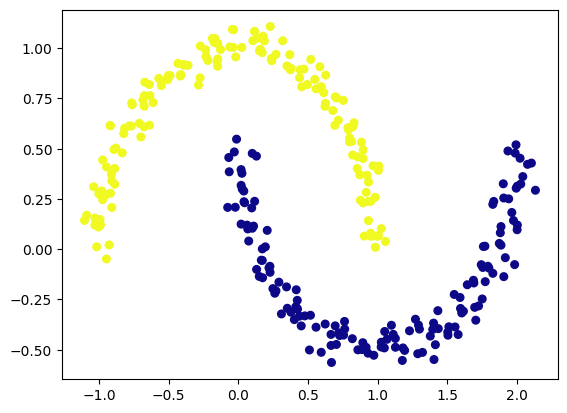

In [32]:
#23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=30)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='black', marker='x')  # noise
plt.show()



In [ ]:
#24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

In [33]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

import numpy as np
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))


{np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


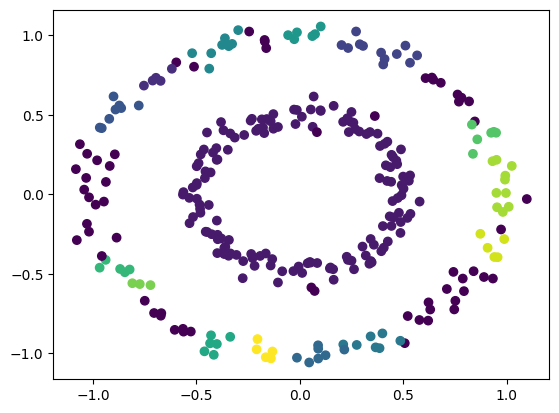

In [34]:
#25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
db = DBSCAN(eps=0.1, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()



In [35]:
#26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

bc = load_breast_cancer()
X = MinMaxScaler().fit_transform(bc.data)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
print(kmeans.cluster_centers_)


[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


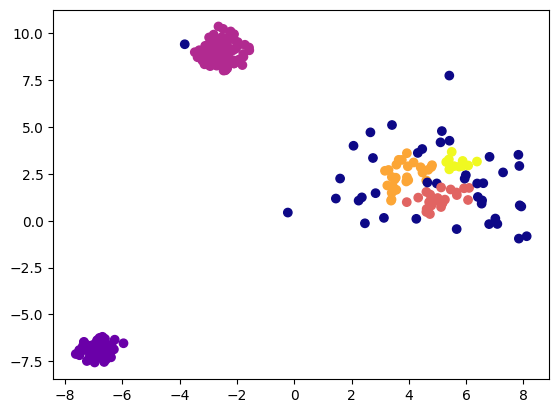

In [36]:
#27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[0.5, 1.5, 0.3], random_state=42)
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap='plasma')
plt.show()


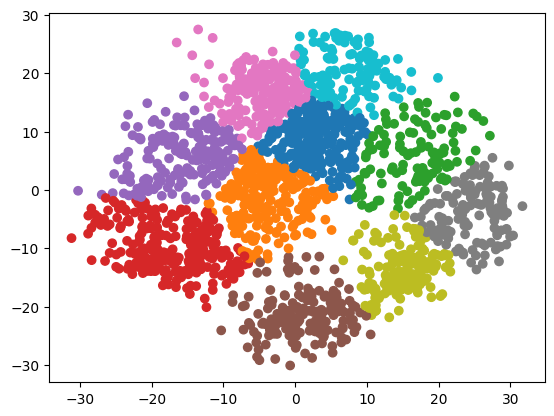

In [37]:
#28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X_pca = PCA(n_components=2).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='tab10')
plt.show()



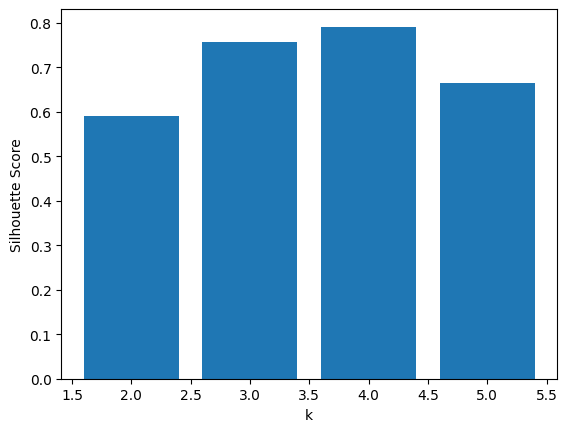

In [38]:

#29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
scores = []
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    scores.append(silhouette_score(X, km.labels_))

plt.bar(range(2, 6), scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()


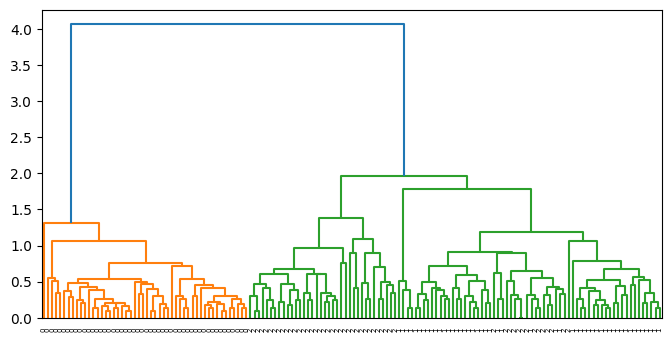

In [39]:
#30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(iris.data, method='average')
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=iris.target)
plt.show()


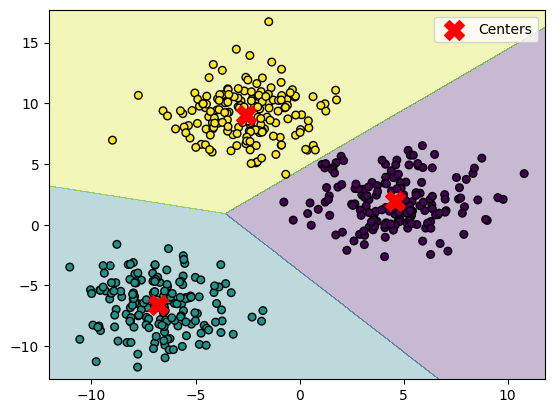

In [40]:
#31 – Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate overlapping blobs
X, y = make_blobs(n_samples=500, centers=3, cluster_std=2.0, random_state=42)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centers')
plt.legend()
plt.show()


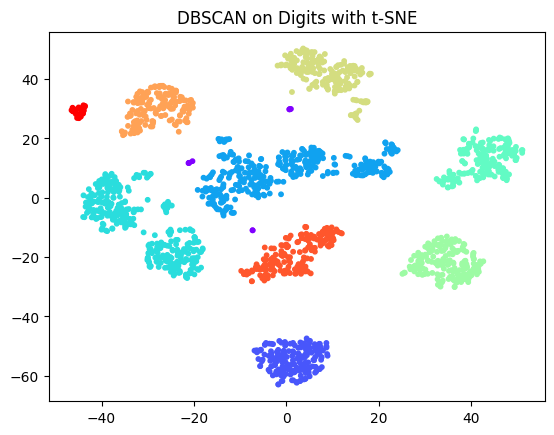

In [41]:
#32 – Load the Digits dataset, apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X)
db = DBSCAN(eps=5, min_samples=5).fit(X_embedded)
labels = db.labels_

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='rainbow', s=10)
plt.title("DBSCAN on Digits with t-SNE")
plt.show()



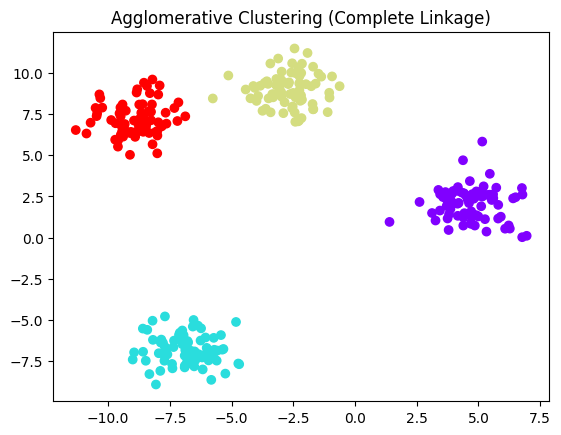

In [42]:
#33 – Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


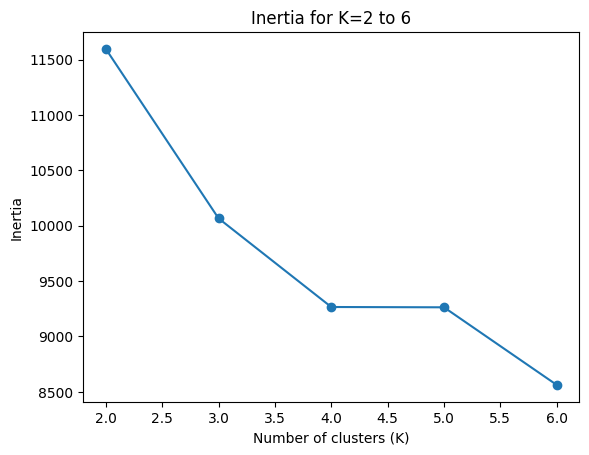

In [43]:
#34 – Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

inertia_values = []
K_range = range(2, 7)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia_values.append(km.inertia_)

plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia for K=2 to 6')
plt.show()


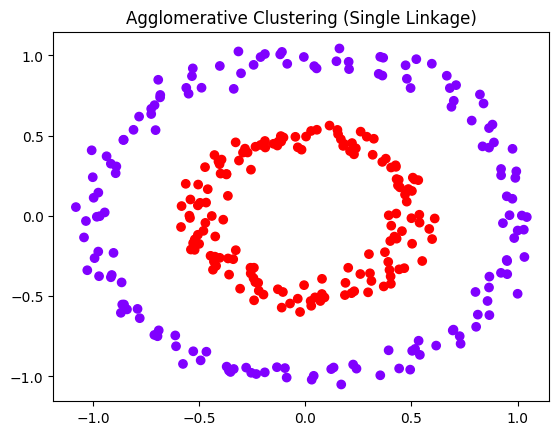

In [44]:
#35 – Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)

agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering (Single Linkage)")
plt.show()


In [45]:
#36 – Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

db = DBSCAN(eps=1.5, min_samples=5).fit(X)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


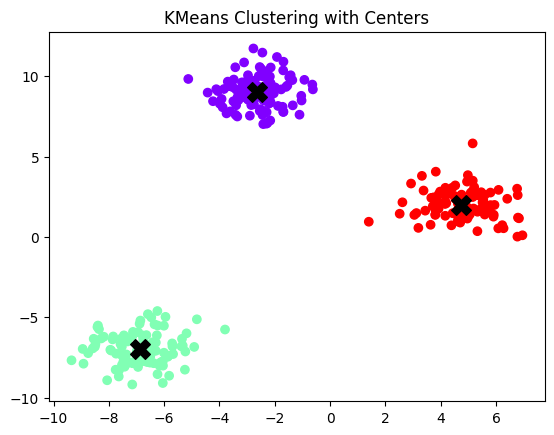

In [46]:
#37 – Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=200, marker='X')
plt.title("KMeans Clustering with Centers")
plt.show()


In [47]:
#38 – Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as nois
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

iris = load_iris()
X = StandardScaler().fit_transform(iris.data)

db = DBSCAN(eps=0.8, min_samples=5).fit(X)
labels = db.labels_
noise_count = list(labels).count(-1)

print("Number of noise samples:", noise_count)


Number of noise samples: 4


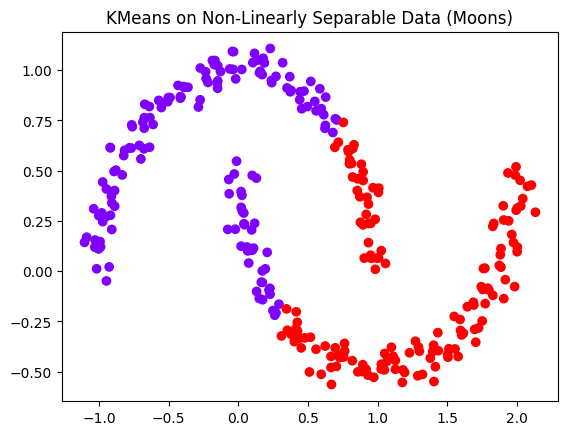

In [48]:
#39 – Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("KMeans on Non-Linearly Separable Data (Moons)")
plt.show()


In [ ]:
#40 – Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data
X_pca = PCA(n_components=3).fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', s=10)
plt.title("KMeans Clustering on Digits (3D PCA)")
plt.show()


In [49]:
#41 – Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, centers=5, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.678738720085253


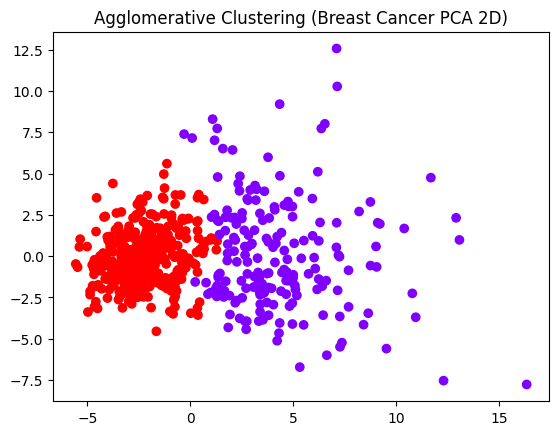

In [50]:
#42 – Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

X_pca = PCA(n_components=2).fit_transform(X)
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering (Breast Cancer PCA 2D)")
plt.show()


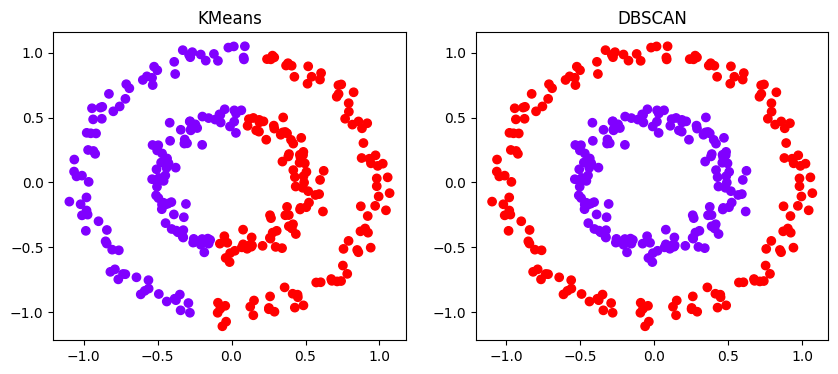

In [51]:
#43 – Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
axes[0].set_title("KMeans")
axes[1].scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='rainbow')
axes[1].set_title("DBSCAN")
plt.show()


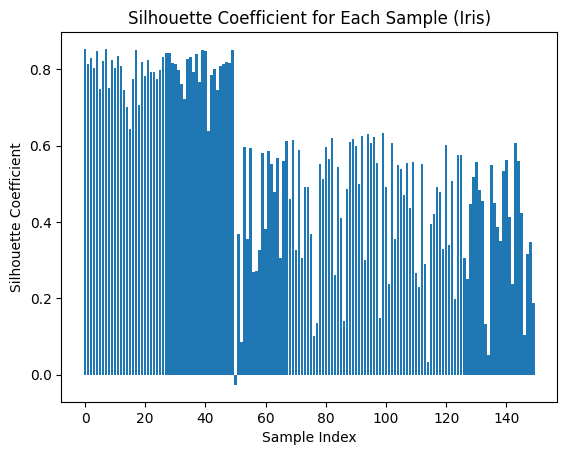

In [52]:
#44 – Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_

silhouette_vals = silhouette_samples(X, labels)

plt.bar(range(len(silhouette_vals)), silhouette_vals)
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient for Each Sample (Iris)")
plt.show()


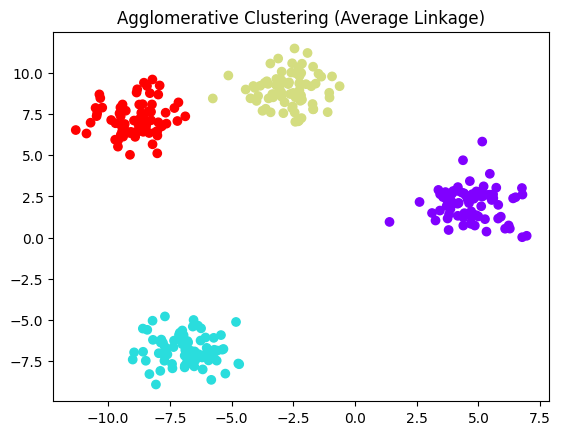

In [53]:

#45 – Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()


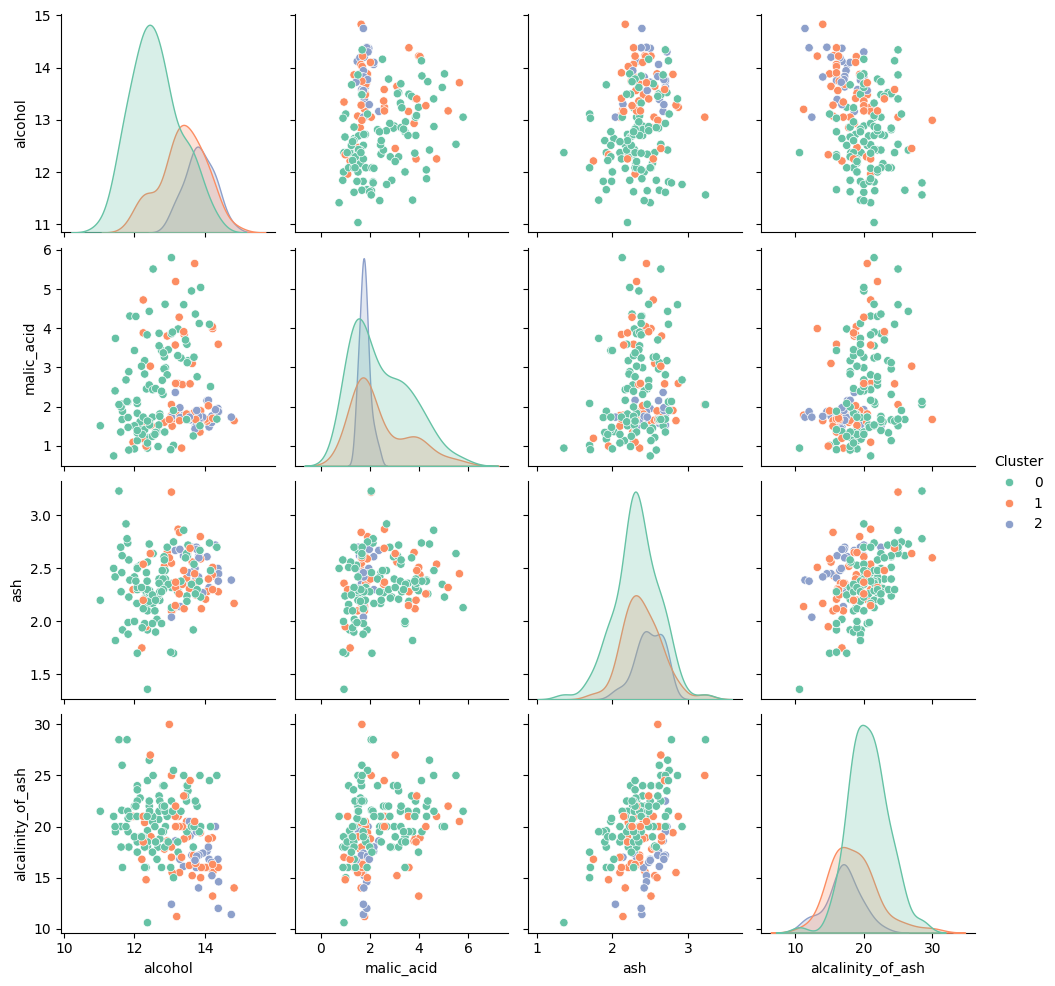

In [57]:
#48 – Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(df)
df['Cluster'] = kmeans.labels_

# Select only first 4 features + Cluster
sns.pairplot(df[wine.feature_names[:4] + ['Cluster']], hue='Cluster', palette='Set2')
plt.show()
